## Plot SSAM (Spektogram) v1.4

In [3]:
# Import library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Definisikan directory data, nama gunung, nama stasiun dan komponen
directory = r"//angsa/data/ssam/16channel/MLLR"
gunung = 'RAUNG'
stasiun = "MLLR"
komponen = "EHZ"

# Tentukan tanggal awal, tanggal akhir, dan interval axis
waktu_awal = '01-02-2025'
waktu_akhir = '02-04-2025'
interval_hari = 3

# Mengambil nilai bulan dan tahun sesuai waktu yang ditentukan
start_year = int(waktu_awal[6:])
end_year = int(waktu_akhir[6:])
start_month = int(waktu_awal[3:5])
end_month = int(waktu_akhir[3:5])

# Proses menggabungkan file-file 
# Nama file ssam harus memiliki format standar earthworm, yaitu "yyyymmdd_station_component_network.dat", contoh "20240508_MLLR_EHZ_VG.dat"
merged_data = pd.DataFrame()
files_to_merge = []  # Variabel ntuk menyimpan daftar file yang akan digabungkan
for filename in os.listdir(directory):
    if filename.endswith(".dat"):
        # Membaca nama file
        try:
            year = int(filename[:4])
            month = int(filename[4:6])
            channel_name = filename[9:13]
            component = filename[14:17]
        except ValueError:
            # Skip file jika tidak dapat di-parse sebagai angka untuk tahun dan bulan
            continue
        # Memeriksa apakah file cocok dengan kriteria sesuai waktu awal, waktu akhir, nama stasiun dan komponen yang ditentukan sebelumnya
        if (start_year < end_year):
            if ((year == start_year and month >= start_month) or (year == end_year and month <= end_month)) and channel_name == stasiun and component == komponen:
                files_to_merge.append(filename)  # Menambahkan nama file ke daftar
                # Membaca file dan menggabungkannya
                filepath = os.path.join(directory, filename)
                data = pd.read_csv(filepath, sep=' ', header=None, names=['Date', 'Time', '0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '8', '10', '15', '20'])
                merged_data = pd.concat([merged_data, data], ignore_index=True)
        else:
            if (year == start_year and month >= start_month and year == end_year and month <= end_month) and channel_name == stasiun and component == komponen:
                files_to_merge.append(filename)  # Menambahkan nama file ke daftar
                # Membaca file dan menggabungkannya
                filepath = os.path.join(directory, filename)
                data = pd.read_csv(filepath, sep=' ', header=None, names=['Date', 'Time', '0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '8', '10', '15', '20'])
                merged_data = pd.concat([merged_data, data], ignore_index=True)

# Mencetak daftar file yang digabungkan dan nilai datanya
print("\nFile yang digabungkan: ")
print("--------------------------------")
if len(files_to_merge) <= 10:
    for item in files_to_merge:
        print(item)
else:
    for item in files_to_merge[:5]:
        print(item)
    print("...")
    for item in files_to_merge[-5:]:
        print(item)
print("Jumlah file : ", len(files_to_merge))
print("________________________________")
print("\nData (5 baris pertama dan 5 baris terakhir:)")
print("--------------------------------")
merged_data



File yang digabungkan: 
--------------------------------
20250201_MLLR_EHZ_RC.dat
20250201_MLLR_EHZ_VG.dat
20250202_MLLR_EHZ_RC.dat
20250202_MLLR_EHZ_VG.dat
20250203_MLLR_EHZ_RC.dat
...
20250330_MLLR_EHZ_VG.dat
20250331_MLLR_EHZ_RC.dat
20250331_MLLR_EHZ_VG.dat
20250401_MLLR_EHZ_RC.dat
20250401_MLLR_EHZ_VG.dat
Jumlah file :  112
________________________________

Data (5 baris pertama dan 5 baris terakhir:)
--------------------------------


,Date,Time,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,8,10,15,20
0,01-FEB-2025,00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01-FEB-2025,00:01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,01-FEB-2025,00:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01-FEB-2025,00:03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,01-FEB-2025,00:04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151175,01-APR-2025,23:54,1,1,1,1,6,11,8,3,2,2,2,1,1,1,0,0,0
151176,01-APR-2025,23:55,1,1,1,1,6,12,8,3,2,2,2,1,2,1,0,0,0
151177,01-APR-2025,23:56,1,0,1,1,4,11,8,3,2,2,2,3,2,2,0,0,0
151178,01-APR-2025,23:57,1,1,1,2,6,12,6,3,1,1,2,2,2,1,0,0,0


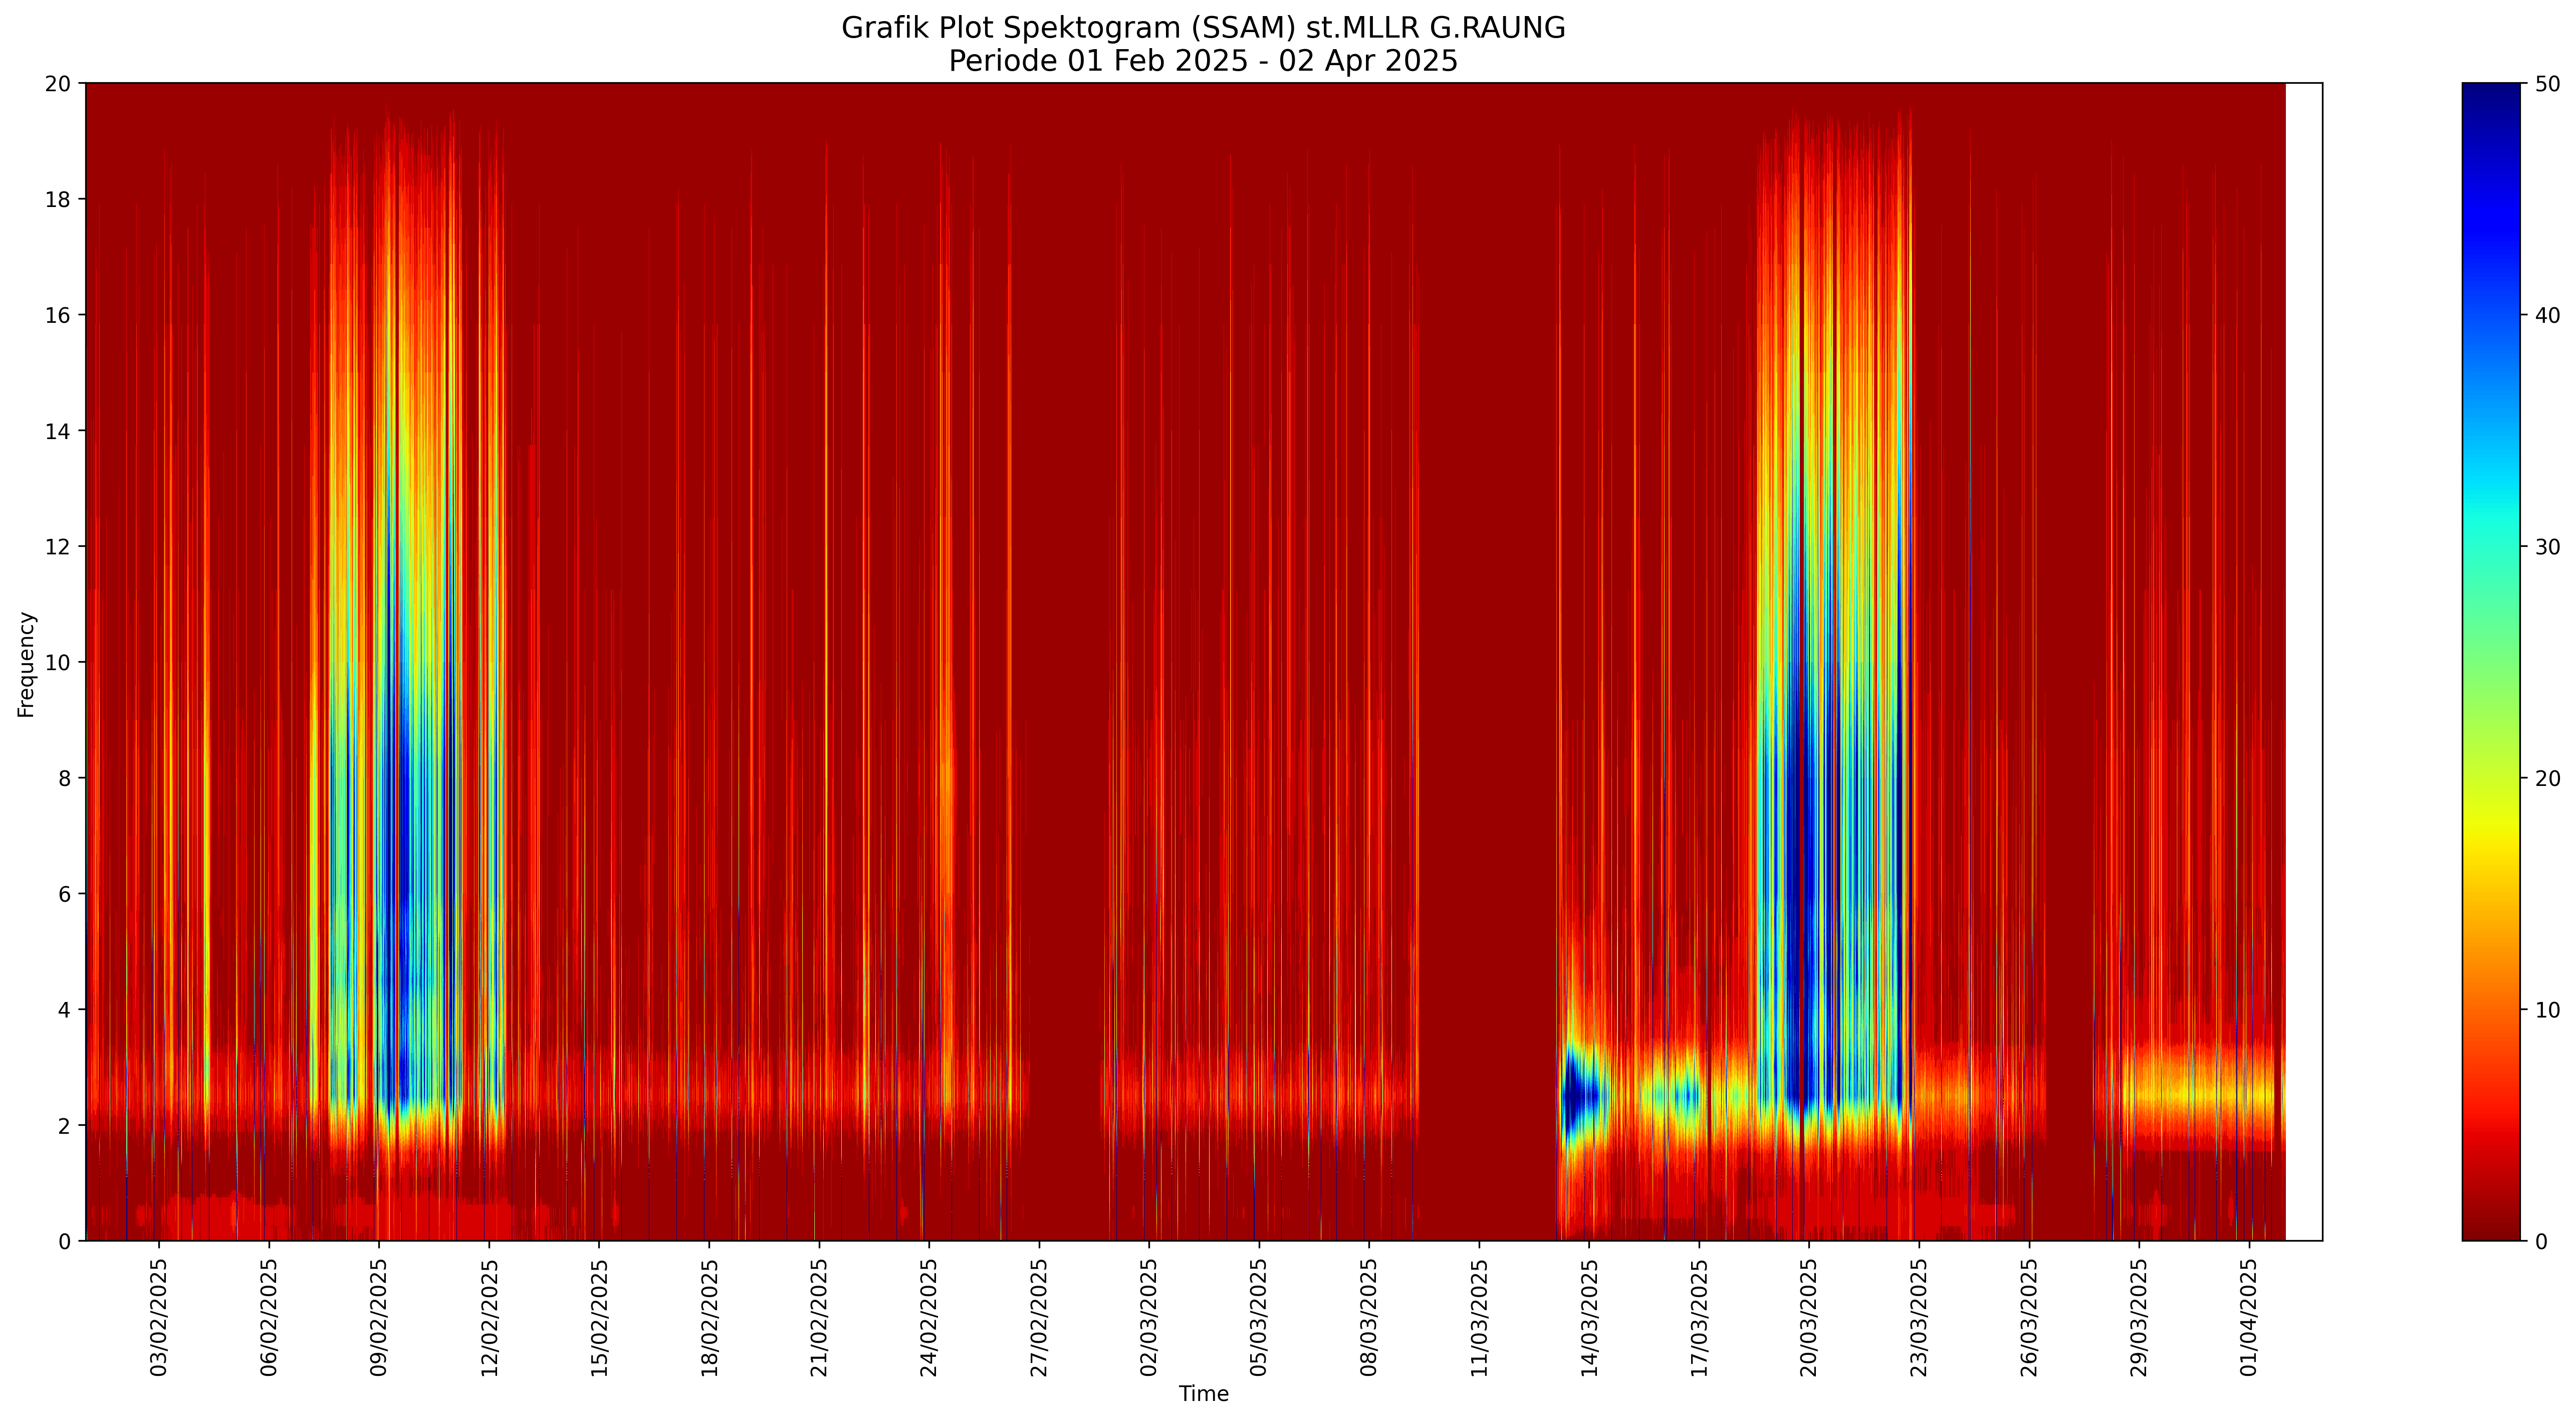

In [4]:
plt.rcParams['agg.path.chunksize'] = 10000
# Menggabungkan kolom Date dan Time menjadi satu kolom dateTime
merged_data['dateTime'] = pd.to_datetime(merged_data['Date'] + ' ' + merged_data['Time'], format='%d-%b-%Y %H:%M')
merged_data = merged_data.drop(columns=['Date', 'Time'])
merged_data.insert(0, 'dateTime', merged_data.pop('dateTime'))
merged_data.columns = range(merged_data.columns.size)

# Mengisi baris kosong dengan nilai 0 agar grafik tidak bolong
new_rows = []
for i in range(1, len(merged_data)):
    prev_time = merged_data.iloc[i-1, 0]
    curr_time = merged_data.iloc[i, 0]
    time_diff = curr_time - prev_time

    if time_diff > pd.Timedelta(minutes=1):
        new_time = prev_time + pd.Timedelta(minutes=1)
        while new_time < curr_time:
            new_row = [new_time] + [0] * (len(merged_data.columns) - 1)
            new_rows.append(new_row)
            new_time += pd.Timedelta(minutes=1)

new_data = pd.concat([merged_data, pd.DataFrame(new_rows, columns=merged_data.columns)])
new_data = new_data.sort_values(0)
new_data = new_data.reset_index(drop=True)

if pd.isna(new_data.iloc[-1, 0]):
    new_data = new_data.drop(new_data.index[-1])

# Extract data menjadi array terpisah sebagai nilai x, y, dan z.
# Waktu akan digunakan sebagai nilai x, frekuensi sebagai y, dan power sebagai z
# Sesuaikan format waktu file data dengan format waktu di bawah.
# Contoh '%m/%d/%Y %H:%M' artinya mm/dd/yyyy hh:mm, '%d/%m/%Y %H:%M' untuk dd/mm/yyy hh:mm. dan sebagainya.
time = pd.to_datetime(new_data[0], format='%d/%m/%Y %H:%M')
freq = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 8, 10, 15, 20])
power = new_data.iloc[:, 1:].values

# Menentukan nilai power minimum dan maksimum yang akan diplot
# Gunakan angka vmax rendah <100 apabila energinya rendah.
vmin = 0
vmax = 50
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Membuat legend colorbar berdasarkan nilai vmin dan vmax
sm = plt.cm.ScalarMappable(cmap='jet_r', norm=norm)

# Melakukan plotting data
# Nilai figsize menentukan ukuran gambar (p, l) dalam inchi.
# Nilai dpi menentukan resolusi gambar, semakin tinggi, resolusi gambar akan semakin tinggi, begitu juga ukuran file gambar.
# Nilai levels menentukan nilai gradasi warna, semakin tinggi gambar akan semakin halus.
fig, ax = plt.subplots(figsize=(24, 10), dpi=300)
c = ax.contourf(time, freq, power.T, levels=300, cmap='jet_r', norm=norm)
colorbar = fig.colorbar(sm, ax=ax)

# Menentukan interval axis y (frekuensi)
# Masukkan nilai interval y ke dalam tanda kurung MultipleLocator().
y_ticks = mticker.MultipleLocator(2)
ax.yaxis.set_major_locator(y_ticks)
ax.set_ylim([0, 20])

# Menentukan interval axis x (waktu)
# Rotation untuk memutar text tanggal, 90 akan membuat tulisan tegak dari bawah ke atas.
days = mdates.DayLocator(interval=interval_hari)
ax.xaxis.set_major_locator(days)
plt.xticks(rotation=90)

# Menentukan format label axis x  pada gambar
# Masukkan format waktu ke dalam tanda kurung DateFormatter().
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
start_time = datetime.strptime(waktu_awal, '%d-%m-%Y')
end_time = datetime.strptime(waktu_akhir, '%d-%m-%Y')
ax.set_xlim([start_time, end_time + timedelta(days=1)])

# Nilai labelsize digunakan untuk mengatur ukuran font axis x :
plt.rc('xtick', labelsize=10)
# Nilai labelsize digunakan untuk mengatur ukuran font axis y :
plt.rc('ytick', labelsize=10)

# Set teks dan ukuran font label axis x :
ax.set_xlabel('Time', fontsize=10)
# Set teks dan ukuran font label axis y :
ax.set_ylabel('Frequency', fontsize=10)

# Set teks dan ukuran font judul :
ax.set_title(f'Grafik Plot Spektogram (SSAM) st.{stasiun} G.{gunung}\nPeriode {start_time.strftime("%d %b %Y")} - {end_time.strftime("%d %b %Y")}', fontsize=14)

# Menampilkan gambar hasil plot
plt.show()

# Mukijo-PVMBG, 2023
# 0856-4334-6785